In [1]:
import pickle
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
from scipy.stats import shapiro
import scipy.stats as stats
import seaborn as sns

E:\conda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
with open('E:/SS_data/pandas/total_dict', 'rb') as file:
    total_dict = pickle.load(file)

In [3]:
test = list(total_dict.values())[126]
test

,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,...,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14
Close,24.610001,25.950001,25.540001,25.340000,26.309999,26.750000,26.670000,25.830000,26.290001,28.330000,...,2.930000,2.790000,2.810000,2.840000,2.820000,2.860000,2.870000,2.900000,2.850000,2.860000
Factor,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
High,0.472032,0.500000,0.497652,0.508540,0.503843,0.522844,0.517506,0.507259,0.500854,0.553587,...,0.001921,0.000000,0.000640,0.000213,0.000000,0.000427,0.001494,0.001494,0.001708,0.000640
Limit_Down,0.463667,0.498313,0.525534,0.517210,0.513161,0.532733,0.541732,0.539932,0.523060,0.532283,...,0.065917,0.059393,0.056468,0.056918,0.057593,0.057143,0.057818,0.058043,0.058718,0.057818
Limit_Up,0.463648,0.498251,0.525492,0.517026,0.512976,0.532671,0.541690,0.540033,0.522915,0.532303,...,0.065894,0.059267,0.056507,0.056875,0.057427,0.057059,0.057979,0.058163,0.058715,0.057795
Low,0.443812,0.478861,0.499671,0.486309,0.495290,0.511062,0.520482,0.494852,0.498576,0.517196,...,0.005257,0.000000,0.001752,0.002191,0.001752,0.001752,0.003067,0.003505,0.003505,0.003286
Open,0.438518,0.467866,0.496144,0.494216,0.487147,0.506427,0.508569,0.505356,0.497429,0.511354,...,0.004713,0.000000,0.001928,0.002571,0.002356,0.001928,0.002999,0.003213,0.003856,0.002999
Total_Turnover,0.115544,0.123910,0.065023,0.074665,0.091074,0.076288,0.038802,0.101155,0.042019,0.105376,...,0.007321,0.050056,0.028147,0.022552,0.023390,0.025265,0.023515,0.015227,0.018276,0.013595
Volume,0.058545,0.059677,0.031055,0.035559,0.042960,0.035210,0.017886,0.048486,0.019976,0.046842,...,0.030786,0.222029,0.123052,0.098237,0.102821,0.110389,0.100600,0.065123,0.078091,0.058706
Capitalization,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.999934,0.999934,0.999934,0.999934,0.999934,0.999934,0.999934


In [4]:
test.loc['Capitalization'].describe()

count    2457.000000
mean        0.601071
std         0.316152
min         0.000000
25%         0.436836
50%         0.730788
75%         0.730788
max         1.000000
Name: Capitalization, dtype: float64

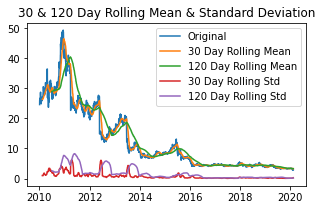

In [28]:
rolling_mean_30 = test.loc['Close'].rolling(window=30).mean()
rolling_mean_120 = test.loc['Close'].rolling(window=120).mean()
rolling_std_30 = test.loc['Close'].rolling(window=30).std()
rolling_std_120 = test.loc['Close'].rolling(window=120).std()

plt.figure(figsize=(5, 3))
plt.plot(test.loc['Close'], label='Original')
plt.plot(rolling_mean_30, label='30 Day Rolling Mean')
plt.plot(rolling_mean_120, label='120 Day Rolling Mean')
plt.plot(rolling_std_30, label='30 Day Rolling Std')
plt.plot(rolling_std_120, label='120 Day Rolling Std')
plt.title('30 & 120 Day Rolling Mean & Standard Deviation')
plt.legend()
plt.show()

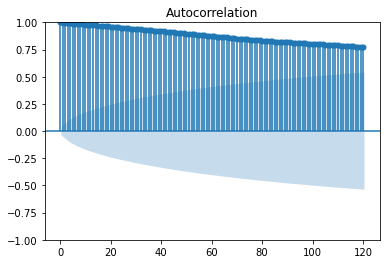

E:\conda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


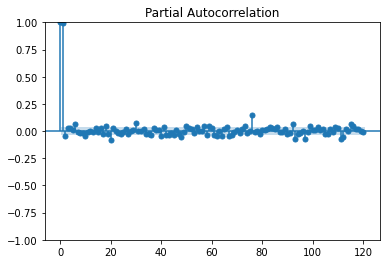

In [29]:
plot_acf(test.loc['Close'], lags=120)
plt.show()

plot_pacf(test.loc['Close'], lags=120)
plt.show()

In [30]:
def perform_adf_test(series):
    """
    对指定时间序列进行ADF平稳性检验。
    """
    result = adfuller(series, autolag='AIC')  # 使用AIC自动选择滞后长度
    adf_statistic = result[0]  # ADF Test Statistic
    p_value = result[1]  # p值
    n_lags = result[2]  # 使用的滞后数
    n_obs = result[3]  # 观测值数量
    critical_values = result[4]  # 不同显著性水平下的临界值
    # 输出结果
    print(f'ADF Statistic: {adf_statistic}')
    print(f'p-value: {p_value}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f'   {key}, {value}')
    # 根据p值判断平稳性
    if p_value < 0.05:
        print("Evidence against the null hypothesis, time series is stationary.")
    else:
        print("Weak evidence against the null hypothesis, time series is non-stationary.")

# 调用函数进行ADF检验
perform_adf_test(test.loc['Close'])

ADF Statistic: -1.5959629289107187
p-value: 0.4856211314844427
Critical Values:
   1%, -3.433036172077103
   5%, -2.862726723070964
   10%, -2.5674017409301175
Weak evidence against the null hypothesis, time series is non-stationary.


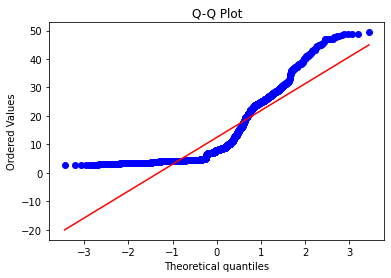

In [31]:
stats.probplot(test.loc['Close'], dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

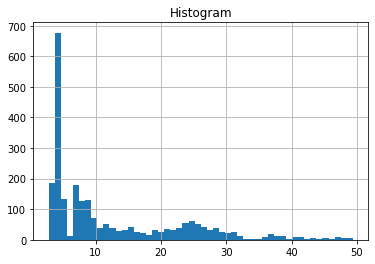

In [32]:
test.loc['Close'].hist(bins=50)
plt.title('Histogram')
plt.show()

In [33]:
stat, p = shapiro(test.loc['Close'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.808, p=0.000
Sample does not look Gaussian (reject H0)
